In [1]:
# 모듈 로딩 
import torch                        # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               # 인공신경망 관련 모듈
import torch.nn.functional as F     # 손실, 거리 등 함수 관련 모듈
import torch.optim as optimizer     # 최적화 기법 관련 모듈

import pandas as pd                 # 데이터 파일 분석 관련 모듈
from sklearn.model_selection import train_test_split

## 스케일도 해야함
from sklearn import minm

In [2]:
torch.manual_seed(1)

In [3]:
# 데이터 로딩 : CSV ==> DataFrame
DATA_FILE = '../data/boston.csv'

DF = pd. read_csv(DATA_FILE)
DF.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [4]:
# 모델 준비
model = nn.Linear(13,1)

In [5]:
for name, param in model.named_parameters():
    print(f'[{name}, {param}]\n')

[weight, Parameter containing:
tensor([[ 0.1429, -0.1224, -0.0538,  0.1302, -0.2611,  0.1663, -0.0571,  0.1411,
          0.0386, -0.0340,  0.0769,  0.0137,  0.1013]], requires_grad=True)]

[bias, Parameter containing:
tensor([-0.1081], requires_grad=True)]



In [6]:
# 모델의 가중치와 절편을 최적화 
adam_optim = optimizer.Adam(model.parameters(), lr=0.1)

In [7]:
featureTS = torch.from_numpy(DF[DF.columns[:-1]].values).float()
featureTS.shape, featureTS.ndim

(torch.Size([506, 13]), 2)

In [8]:
targetTS = torch.from_numpy(DF[['MEDV']].values).float()
targetTS.shape, targetTS.ndim # 차원 맞춰서

(torch.Size([506, 1]), 2)

In [9]:
# Train & test
X_train, X_test, y_train, y_test = train_test_split(featureTS,
                                                    targetTS,
                                                    test_size=0.2)

# Train & val
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.2)

print(f'[feature] Train{X_train.shape}, Test{X_test.shape}, Cal{X_val.shape}')
print(f'[target] Train{y_train.shape}, Test{y_test.shape}, Cal{y_val.shape}')

[feature] Traintorch.Size([323, 13]), Testtorch.Size([102, 13]), Caltorch.Size([81, 13])
[target] Traintorch.Size([323, 1]), Testtorch.Size([102, 1]), Caltorch.Size([81, 1])


In [10]:
EPOCH = 10

In [11]:
# 모델 검증 및 테스트 
def testing(testTS,targetTS, kind="Val"):

    with torch.no_grad():

        # 1. 학습진행 
        pre_y = model(testTS)
        print(f'{pre_y.shape}')

        # 2. 오차계산 
        loss = F.mse_loss(pre_y, targetTS) 

        # 3. 학습결과 출력 및 저장
        print(f'[ {kind} ] LOSS : {loss}')

    return loss

In [12]:
# 모델 학습 함수
def training(featureTS, targetTS, valTS, valTargetTS):

    loss_history= [[],[]]

    for epoch in range(EPOCH):

        # 1. 학습진행 - forward
        pre_y = model(featureTS)
        print(f'{pre_y.shape}')

        # 2. 오차계산 - 손실함수 
        loss = F.mse_loss(pre_y, targetTS)  
        loss_history[0].append(loss.item())

        # 3. 최적화 
        adam_optim.zero_grad() 
        loss.backward()
        adam_optim.step()

        # 3-1 검증
        val_loss = testing(valTS, valTargetTS)
        loss_history[1].append(val_loss.item())

        # 4. 학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [13]:
# 모델 학습
loss = training(X_train, y_train, X_val, y_val)

torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 3823.623779296875
[0/10] LOSS : 1168.4527587890625
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 981.0526733398438
[1/10] LOSS : 3811.234619140625
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 365.2235412597656
[2/10] LOSS : 946.9560546875
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 1740.89990234375
[3/10] LOSS : 370.4118957519531
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 1305.152099609375
[4/10] LOSS : 1804.42919921875
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 231.66311645507812
[5/10] LOSS : 1353.7889404296875
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 275.475830078125
[6/10] LOSS : 237.00503540039062
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 978.9070434570312
[7/10] LOSS : 263.50115966796875
torch.Size([323, 1])
torch.Size([81, 1])
[ Val ] LOSS : 987.4929809570312
[8/10] LOSS : 974.5071411132812
torch.Size([323, 1])
torch.Size([81, 1])
[ Val 

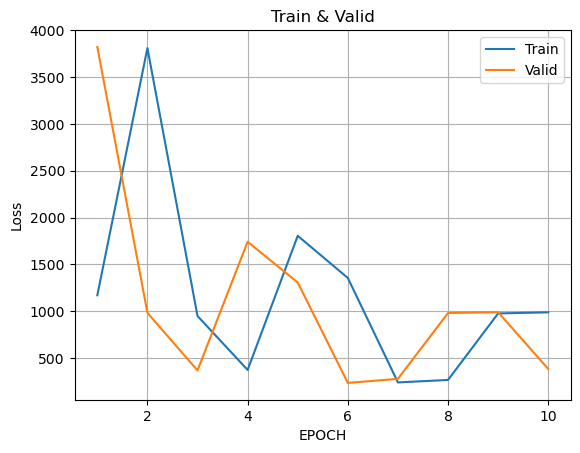

In [14]:
# 시각화화
import matplotlib.pyplot as plt

plt.plot(range(1,11), loss[0], label='Train')
plt.plot(range(1,11), loss[1], label='Valid')
plt.title('Train & Valid')
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()